# Методы машинного обучения.

## ЛР10. - Кластерный анализ.

Воспользоваться набором данных из ЛР 8.
- Провести кластерный анализ данных. Использовать не менее двух  алгоритмов кластеризации (например: иерархический, К-средних, DBSCAN и др.). Варьировать различные значения гиперпараметров и тип расстояний.
- Оценить работу алгоритмов с использованием внешних и внутренних мер оценки качества (в том числе, построить таблицу сопряженности с учетом классов Шкалы Кантрила). Определить оптимальное количество кластеров и их структуру.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ml_lab_08/ММО_ЛР8_Исходные_данные.xlsx')
dataset

,Респондент,Сообщество,"Среднегодовой.доход,.тыс..$","Объем.потребленного.алкоголя.в.год,.л.",Количество.членов.семьи,Количество.лет.образования,"Доля.от.дохода.семьи.которая.тратится.на.продовольствие,.%",Коэффициент.Джини.сообщества,"Издержки.сообщества.на.окружающую.среду,.млн..$","Охват.беспроводной.связи.в.сообществе,.%",...,Индекс.Щедрости,Индекс.отношения.к.коррупции,Оценка.риска.безработицы,Индекс.кредитного.оптимизма,Индекс.страха.социальных.конфликтов,Индекс.семьи,Индекс.продовольственной.безопасности,Чувство.технологического.прогресса,Чувство.неравенства.доходов.в.обществе,Ощущаемое.счастье
0,Респондент 1,Сообщество 480,21.350,62,4,5,65,0.608084,197.16,0.330140,...,67.0,69.0,71.0,38.0,92.0,11.0,95.0,16.0,14.0,Depressed
1,Респондент 2,Сообщество 130,622.613,30,7,21,39,0.369140,297.10,0.580329,...,49.0,29.0,36.0,66.0,31.0,49.0,3.0,72.0,60.0,Blooming
2,Респондент 3,Сообщество 156,400.896,45,2,8,45,0.345094,305.32,0.624832,...,19.0,73.0,49.0,61.0,19.0,39.0,82.0,38.0,60.0,Just ok
3,Респондент 4,Сообщество 69,375.950,56,5,10,68,0.635868,78.78,0.240157,...,83.0,50.0,67.0,35.0,77.0,28.0,50.0,33.0,1.0,Depressed
4,Респондент 5,Сообщество 330,925.782,39,6,18,38,0.787911,93.35,0.229719,...,76.0,62.0,44.0,40.0,86.0,51.0,76.0,64.0,55.0,Blooming
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35995,Респондент 35996,Сообщество 318,412.715,46,3,11,50,0.921816,59.51,0.227329,...,14.0,80.0,53.0,30.0,35.0,24.0,29.0,33.0,11.0,Suffering
35996,Респондент 35997,Сообщество 384,373.757,48,1,8,50,0.620469,144.79,0.385055,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Неизвестно
35997,Респондент 35998,Сообщество 331,374.882,38,1,18,39,0.498873,207.14,0.495535,...,10.0,76.0,27.0,63.0,96.0,35.0,58.0,55.0,2.0,Thriving
35998,Респондент 35999,Сообщество 402,412.314,51,3,12,44,0.663517,108.70,0.269634,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Неизвестно


In [ ]:
dataset = dataset.drop(['Респондент'], axis=1)
dataset

,Сообщество,"Среднегодовой.доход,.тыс..$","Объем.потребленного.алкоголя.в.год,.л.",Количество.членов.семьи,Количество.лет.образования,"Доля.от.дохода.семьи.которая.тратится.на.продовольствие,.%",Коэффициент.Джини.сообщества,"Издержки.сообщества.на.окружающую.среду,.млн..$","Охват.беспроводной.связи.в.сообществе,.%","Количество.смертей.от.вирусных.и.респираторных.заболеваний.в.сообществе,.тыс..человек",...,Индекс.Щедрости,Индекс.отношения.к.коррупции,Оценка.риска.безработицы,Индекс.кредитного.оптимизма,Индекс.страха.социальных.конфликтов,Индекс.семьи,Индекс.продовольственной.безопасности,Чувство.технологического.прогресса,Чувство.неравенства.доходов.в.обществе,Ощущаемое.счастье
0,Сообщество 480,21.350,62,4,5,65,0.608084,197.16,0.330140,14.18,...,67.0,69.0,71.0,38.0,92.0,11.0,95.0,16.0,14.0,Depressed
1,Сообщество 130,622.613,30,7,21,39,0.369140,297.10,0.580329,11.70,...,49.0,29.0,36.0,66.0,31.0,49.0,3.0,72.0,60.0,Blooming
2,Сообщество 156,400.896,45,2,8,45,0.345094,305.32,0.624832,2.01,...,19.0,73.0,49.0,61.0,19.0,39.0,82.0,38.0,60.0,Just ok
3,Сообщество 69,375.950,56,5,10,68,0.635868,78.78,0.240157,13.42,...,83.0,50.0,67.0,35.0,77.0,28.0,50.0,33.0,1.0,Depressed
4,Сообщество 330,925.782,39,6,18,38,0.787911,93.35,0.229719,12.38,...,76.0,62.0,44.0,40.0,86.0,51.0,76.0,64.0,55.0,Blooming
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35995,Сообщество 318,412.715,46,3,11,50,0.921816,59.51,0.227329,13.41,...,14.0,80.0,53.0,30.0,35.0,24.0,29.0,33.0,11.0,Suffering
35996,Сообщество 384,373.757,48,1,8,50,0.620469,144.79,0.385055,11.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Неизвестно
35997,Сообщество 331,374.882,38,1,18,39,0.498873,207.14,0.495535,11.87,...,10.0,76.0,27.0,63.0,96.0,35.0,58.0,55.0,2.0,Thriving
35998,Сообщество 402,412.314,51,3,12,44,0.663517,108.70,0.269634,13.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Неизвестно


In [ ]:
dataset['Сообщество'] = dataset['Сообщество'].apply(lambda it: int(re.findall(r'\b\d+\b', it)[0]))
dataset

,Сообщество,"Среднегодовой.доход,.тыс..$","Объем.потребленного.алкоголя.в.год,.л.",Количество.членов.семьи,Количество.лет.образования,"Доля.от.дохода.семьи.которая.тратится.на.продовольствие,.%",Коэффициент.Джини.сообщества,"Издержки.сообщества.на.окружающую.среду,.млн..$","Охват.беспроводной.связи.в.сообществе,.%","Количество.смертей.от.вирусных.и.респираторных.заболеваний.в.сообществе,.тыс..человек",...,Индекс.Щедрости,Индекс.отношения.к.коррупции,Оценка.риска.безработицы,Индекс.кредитного.оптимизма,Индекс.страха.социальных.конфликтов,Индекс.семьи,Индекс.продовольственной.безопасности,Чувство.технологического.прогресса,Чувство.неравенства.доходов.в.обществе,Ощущаемое.счастье
0,480,21.350,62,4,5,65,0.608084,197.16,0.330140,14.18,...,67.0,69.0,71.0,38.0,92.0,11.0,95.0,16.0,14.0,Depressed
1,130,622.613,30,7,21,39,0.369140,297.10,0.580329,11.70,...,49.0,29.0,36.0,66.0,31.0,49.0,3.0,72.0,60.0,Blooming
2,156,400.896,45,2,8,45,0.345094,305.32,0.624832,2.01,...,19.0,73.0,49.0,61.0,19.0,39.0,82.0,38.0,60.0,Just ok
3,69,375.950,56,5,10,68,0.635868,78.78,0.240157,13.42,...,83.0,50.0,67.0,35.0,77.0,28.0,50.0,33.0,1.0,Depressed
4,330,925.782,39,6,18,38,0.787911,93.35,0.229719,12.38,...,76.0,62.0,44.0,40.0,86.0,51.0,76.0,64.0,55.0,Blooming
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35995,318,412.715,46,3,11,50,0.921816,59.51,0.227329,13.41,...,14.0,80.0,53.0,30.0,35.0,24.0,29.0,33.0,11.0,Suffering
35996,384,373.757,48,1,8,50,0.620469,144.79,0.385055,11.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Неизвестно
35997,331,374.882,38,1,18,39,0.498873,207.14,0.495535,11.87,...,10.0,76.0,27.0,63.0,96.0,35.0,58.0,55.0,2.0,Thriving
35998,402,412.314,51,3,12,44,0.663517,108.70,0.269634,13.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Неизвестно


In [ ]:
na = set(dataset.columns).difference(dataset.dropna(axis=1).columns)
na

{'Индекс.Щедрости',
 'Индекс.кредитного.оптимизма',
 'Индекс.отношения.к.коррупции',
 'Индекс.продовольственной.безопасности',
 'Индекс.семьи',
 'Индекс.страха.социальных.конфликтов',
 'Ожидаемая.продолжительность.здоровой.жизни',
 'Оценка.благополучия',
 'Оценка.риска.безработицы',
 'Оценка.социальной.поддержки',
 'Свобода.граждан.самостоятельно.принимать.жизненно.важные.решения',
 'Чувство.неравенства.доходов.в.обществе',
 'Чувство.технологического.прогресса'}

In [ ]:
class_names = list(set(dataset['Ощущаемое.счастье']))
class_names.remove('Неизвестно')
class_names

['Suffering',
 'Hopeless',
 'Doing well',
 'Strugglng',
 'Coping',
 'Just ok',
 'Prospering',
 'Blooming',
 'Depressed',
 'Thriving']

In [ ]:
from operator import itemgetter

group = {
    0: 0,
    1: 0,
    2: 0,
    3: 0,
    4: 1,
    5: 1,
    6: 1,
    7: 2,
    8: 2,
    9: 2,
}

rank_mapping = {
    'Prospering': 0,
    'Thriving': 1,
    'Blooming': 2,
    'Doing well': 3,
    'Just ok': 4,
    'Coping': 5,
    'Strugglng': 6,
    'Suffering': 7,
    'Depressed': 8,
    'Hopeless': 9,
}

labels = sorted(list(set(class_names)), key=lambda v: rank_mapping[v])
labels

['Prospering',
 'Thriving',
 'Blooming',
 'Doing well',
 'Just ok',
 'Coping',
 'Strugglng',
 'Suffering',
 'Depressed',
 'Hopeless']

In [ ]:
dataset_knowns = dataset[dataset['Ощущаемое.счастье'] != 'Неизвестно']
dataset_knowns

,Сообщество,"Среднегодовой.доход,.тыс..$","Объем.потребленного.алкоголя.в.год,.л.",Количество.членов.семьи,Количество.лет.образования,"Доля.от.дохода.семьи.которая.тратится.на.продовольствие,.%",Коэффициент.Джини.сообщества,"Издержки.сообщества.на.окружающую.среду,.млн..$","Охват.беспроводной.связи.в.сообществе,.%","Количество.смертей.от.вирусных.и.респираторных.заболеваний.в.сообществе,.тыс..человек",...,Индекс.Щедрости,Индекс.отношения.к.коррупции,Оценка.риска.безработицы,Индекс.кредитного.оптимизма,Индекс.страха.социальных.конфликтов,Индекс.семьи,Индекс.продовольственной.безопасности,Чувство.технологического.прогресса,Чувство.неравенства.доходов.в.обществе,Ощущаемое.счастье
0,480,21.350,62,4,5,65,0.608084,197.16,0.330140,14.18,...,67.0,69.0,71.0,38.0,92.0,11.0,95.0,16.0,14.0,Depressed
1,130,622.613,30,7,21,39,0.369140,297.10,0.580329,11.70,...,49.0,29.0,36.0,66.0,31.0,49.0,3.0,72.0,60.0,Blooming
2,156,400.896,45,2,8,45,0.345094,305.32,0.624832,2.01,...,19.0,73.0,49.0,61.0,19.0,39.0,82.0,38.0,60.0,Just ok
3,69,375.950,56,5,10,68,0.635868,78.78,0.240157,13.42,...,83.0,50.0,67.0,35.0,77.0,28.0,50.0,33.0,1.0,Depressed
4,330,925.782,39,6,18,38,0.787911,93.35,0.229719,12.38,...,76.0,62.0,44.0,40.0,86.0,51.0,76.0,64.0,55.0,Blooming
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35993,450,458.691,47,1,14,50,0.356139,260.35,0.497796,12.09,...,14.0,75.0,39.0,66.0,67.0,39.0,71.0,51.0,48.0,Just ok
35994,567,418.492,54,2,11,47,0.841676,21.94,0.173420,21.86,...,32.0,90.0,50.0,30.0,19.0,26.0,32.0,33.0,7.0,Suffering
35995,318,412.715,46,3,11,50,0.921816,59.51,0.227329,13.41,...,14.0,80.0,53.0,30.0,35.0,24.0,29.0,33.0,11.0,Suffering
35997,331,374.882,38,1,18,39,0.498873,207.14,0.495535,11.87,...,10.0,76.0,27.0,63.0,96.0,35.0,58.0,55.0,2.0,Thriving


In [ ]:
y_true = np.array([labels.index(xi) for xi in dataset_knowns['Ощущаемое.счастье'][:10000].to_numpy()])
X = dataset_knowns.drop('Ощущаемое.счастье', axis=1).values[:10000]
X

array([[480.   ,  21.35 ,  62.   , ...,  95.   ,  16.   ,  14.   ],
       [130.   , 622.613,  30.   , ...,   3.   ,  72.   ,  60.   ],
       [156.   , 400.896,  45.   , ...,  82.   ,  38.   ,  60.   ],
       ...,
       [595.   , 140.159,  62.   , ...,  54.   ,  34.   ,  46.   ],
       [ 63.   , 248.708,  57.   , ...,  68.   ,  45.   ,  44.   ],
       [219.   ,  27.381,  74.   , ...,  12.   ,   9.   ,  33.   ]])

In [ ]:
y_true

array([8, 2, 4, ..., 6, 7, 9])

In [ ]:
labels_true = np.array([labels[i] for i in y_true])
labels_true

array(['Depressed', 'Blooming', 'Just ok', ..., 'Strugglng', 'Suffering',
       'Hopeless'], dtype='<U10')

In [ ]:
np.unique(y_true)
len(np.unique(y_true))

10

In [ ]:
import umap
!pip install umap-learn[plot]
import umap.plot
from umap import UMAP
import time
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

def evaluate_clustering(X, y_true, distance_threshold, metric='euclidean', linkage='ward'):
    clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=distance_threshold, metric=metric, linkage=linkage)

    start = time.process_time()
    y_pred = clustering.fit_predict(X)
    diff = time.process_time() - start

    n_clusters = len(np.unique(y_pred))

    return y_pred, n_clusters, {
        'Time': diff,
        'ARI': adjusted_rand_score(y_true, y_pred),
    }

def find_optimal_clustering(X, y_true, metric='euclidean', linkage='ward', iterations=1000):
    optimal_threshold = None
    best_metrics = None
    y_optimal = None
    n_clusters_optimal = None

    dist = pairwise_distances(X, metric=metric)

    for threshold in np.linspace(np.min(dist), np.max(dist), iterations):
        #print(threshold, metric, linkage)
        y_pred, n_clusters, metrics = evaluate_clustering(dist, y_true, threshold, 'precomputed', linkage)

        ari = metrics['ARI']
        if best_metrics is None or ari > best_metrics['ARI']:
            best_metrics = metrics
            y_optimal = y_pred
            optimal_threshold = threshold
            n_clusters_optimal = n_clusters

    return optimal_threshold, best_metrics, y_optimal, n_clusters_optimal

In [ ]:
import seaborn as sns

def plot_clustering_heatmap(X, y_true):
  distances = ['euclidean', 'manhattan', 'cosine']
  linkages = ['complete', 'average'] # , 'single'

  time, ari, n_clusters = np.ndarray((len(distances), len(linkages))), np.ndarray((len(distances), len(linkages))), np.ndarray((len(distances), len(linkages)))

  for i, metric in enumerate(distances):
    for j, linkage in enumerate(linkages):
      #print(metric, linkage)
      try:
        _, metrics, _, n = find_optimal_clustering(X, y_true, metric=metric, linkage=linkage, iterations=10)
        #print(metrics)
        time[i, j], ari[i, j], n_clusters[i, j] = metrics['Time'], metrics['ARI'], n
      except Exception as e:
        print(e)
        time[i, j], ari[i, j], n_clusters[i, j] = 0, 0, 0

  fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15, 4))
  sns.heatmap(time, ax=ax1, annot=True, cmap='Reds', xticklabels=linkages, yticklabels=distances)
  sns.heatmap(ari, ax=ax2, annot=True, cmap='Reds', xticklabels=linkages, yticklabels=distances)
  sns.heatmap(n_clusters, ax=ax3, annot=True, cmap='Reds', xticklabels=linkages, yticklabels=distances)
  ax1.set_title('Time')
  ax2.set_title('ARI score')
  ax3.set_title('Clusters count')
  plt.show()

In [ ]:
from sklearn.metrics import pairwise_distances
from collections import Counter
from mpl_toolkits import mplot3d
%matplotlib inline

def class_purity(y_true, y_pred, cls):
    class_mask = (y_true == cls)
    class_predictions = y_pred[class_mask]
    cluster_counts = Counter(class_predictions).values()
    purity = max(cluster_counts) / len(class_predictions)
    return purity

def plot_clustering(title, X, y_true, y_pred, metric):
    fig, plots = plt.subplots(2, 2, figsize=(12,12))
    fig.suptitle(title)
    plt.prism()

    n_clusters = len(np.unique(y_true))
    purities = []

    ax = fig.add_subplot(2, 2, 1, projection='3d') if X.shape[1] == 3 else plots[0, 0]
    for i in range(n_clusters):
        digit_indices = (y_true == i)
        purities.append(class_purity(y_true, y_pred, i))
        dims = [X[digit_indices, i] for i in range(X.shape[1])]
        ax.set_title('Original')
        ax.scatter(*dims, label=f"Class {i}")
        ax.legend()

    purities.append(np.average(purities))

    avg_dist = np.zeros((n_clusters, n_clusters))
    for i in range(n_clusters):
        for j in range(n_clusters):
            avg_dist[i, j] = pairwise_distances(
                X[y_true == i], X[y_true == j], metric=metric
            ).mean()
    avg_dist /= avg_dist.max()
    sns.heatmap(avg_dist, ax=plots[1, 0], annot=True, cmap='Reds', xticklabels=np.arange(n_clusters), yticklabels=np.arange(n_clusters))

    inner_distances = [avg_dist[i, i] for i in range(n_clusters)]
    inner_distances.append(np.average(inner_distances))
    sns.heatmap([inner_distances, purities], ax=plots[1, 1], annot=True, cmap='Reds', xticklabels=[*np.arange(n_clusters), 'avg'], yticklabels=['inner distance', 'purity'])

    n_clusters = len(np.unique(y_pred))

    ax = fig.add_subplot(2, 2, 2, projection='3d') if X.shape[1] == 3 else plots[0, 1]
    for i in range(n_clusters):
        digit_indices = (y_pred == i)
        dims = [X[digit_indices, i] for i in range(X.shape[1])]
        ax.set_title('Prediction')
        ax.scatter(*dims, label=f"Cluster {i}")
        ax.legend()

    plt.tight_layout()
    plt.legend(loc='best')
    plt.show()

In [ ]:
umap_3d_embeddings = UMAP(n_components=3, random_state=7).fit_transform(X)

In [ ]:
umap_3d_embeddings.shape

(10000, 3)

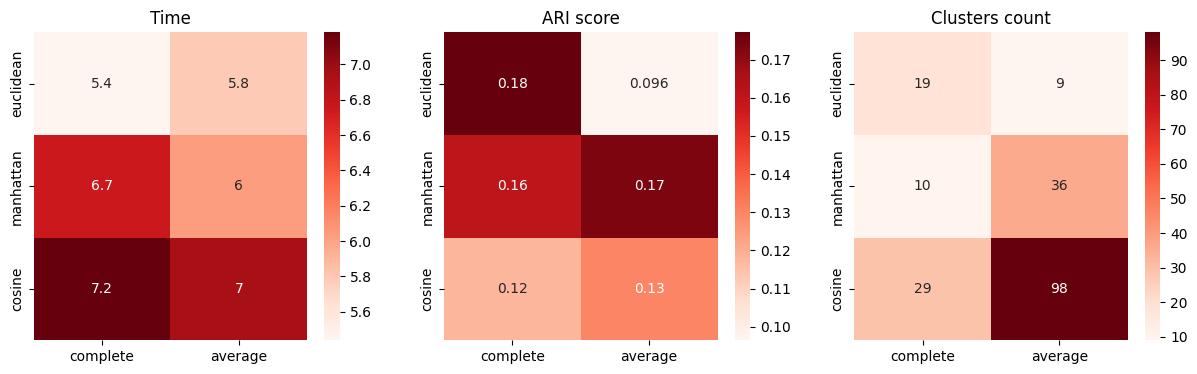

In [ ]:
plot_clustering_heatmap(X, y_true)

In [ ]:
threshold, metrics, y_pred_best, n_clusters = find_optimal_clustering(X, y_true, metric='euclidean', linkage='complete', iterations=100)
print(metrics, n_clusters)

{'Time': 5.479355962999989, 'ARI': 0.18467425118235076} 14


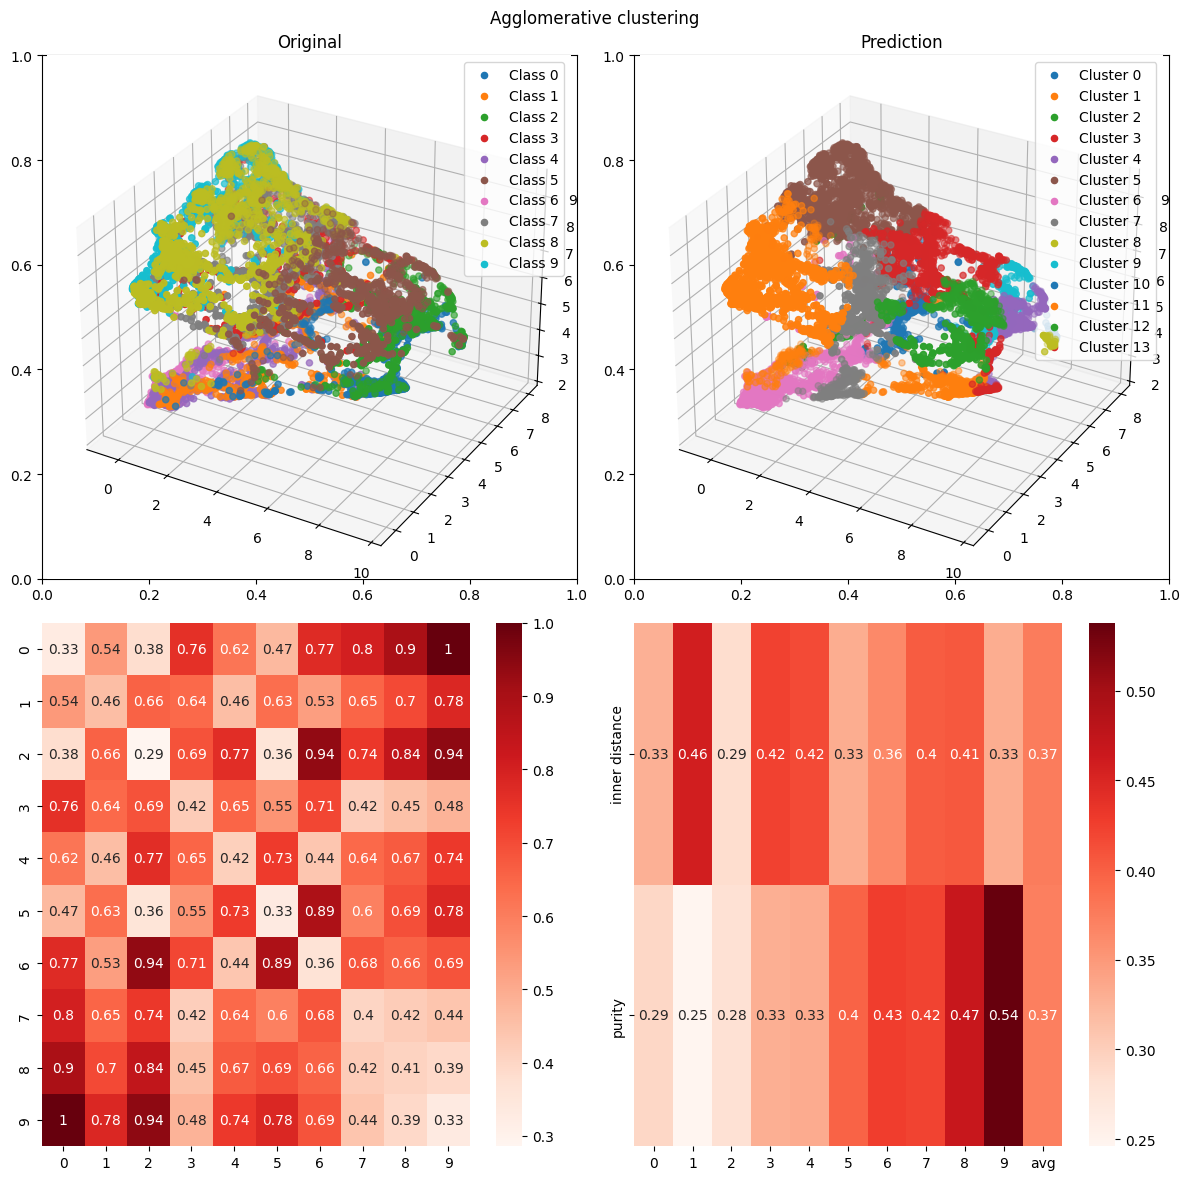

In [ ]:
plot_clustering('Agglomerative clustering', umap_3d_embeddings, y_true, y_pred_best, 'manhattan')

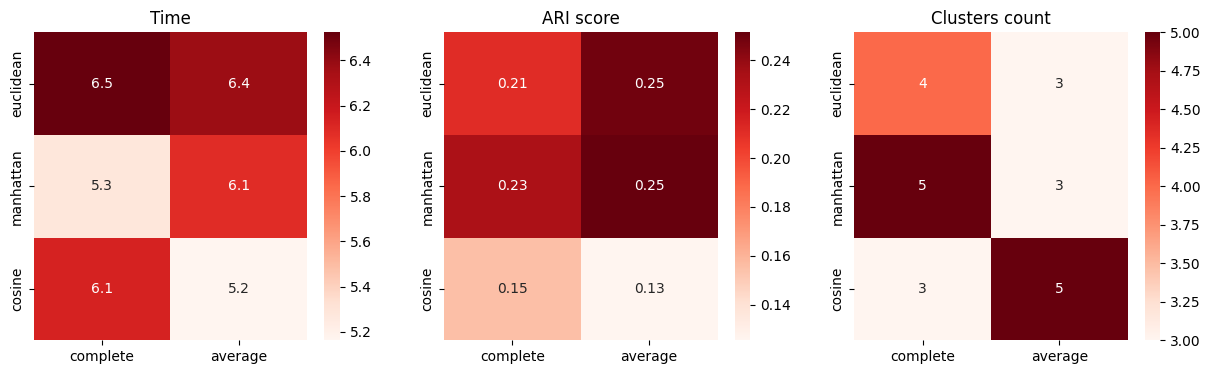

In [ ]:
plot_clustering_heatmap(umap_3d_embeddings, y_true)

In [ ]:
threshold, metrics, y_pred_best, n_clusters = find_optimal_clustering(umap_3d_embeddings, y_true, metric='manhattan', linkage='average', iterations=100)
print(metrics, n_clusters)

{'Time': 6.010581300000013, 'ARI': 0.273719245820661} 4


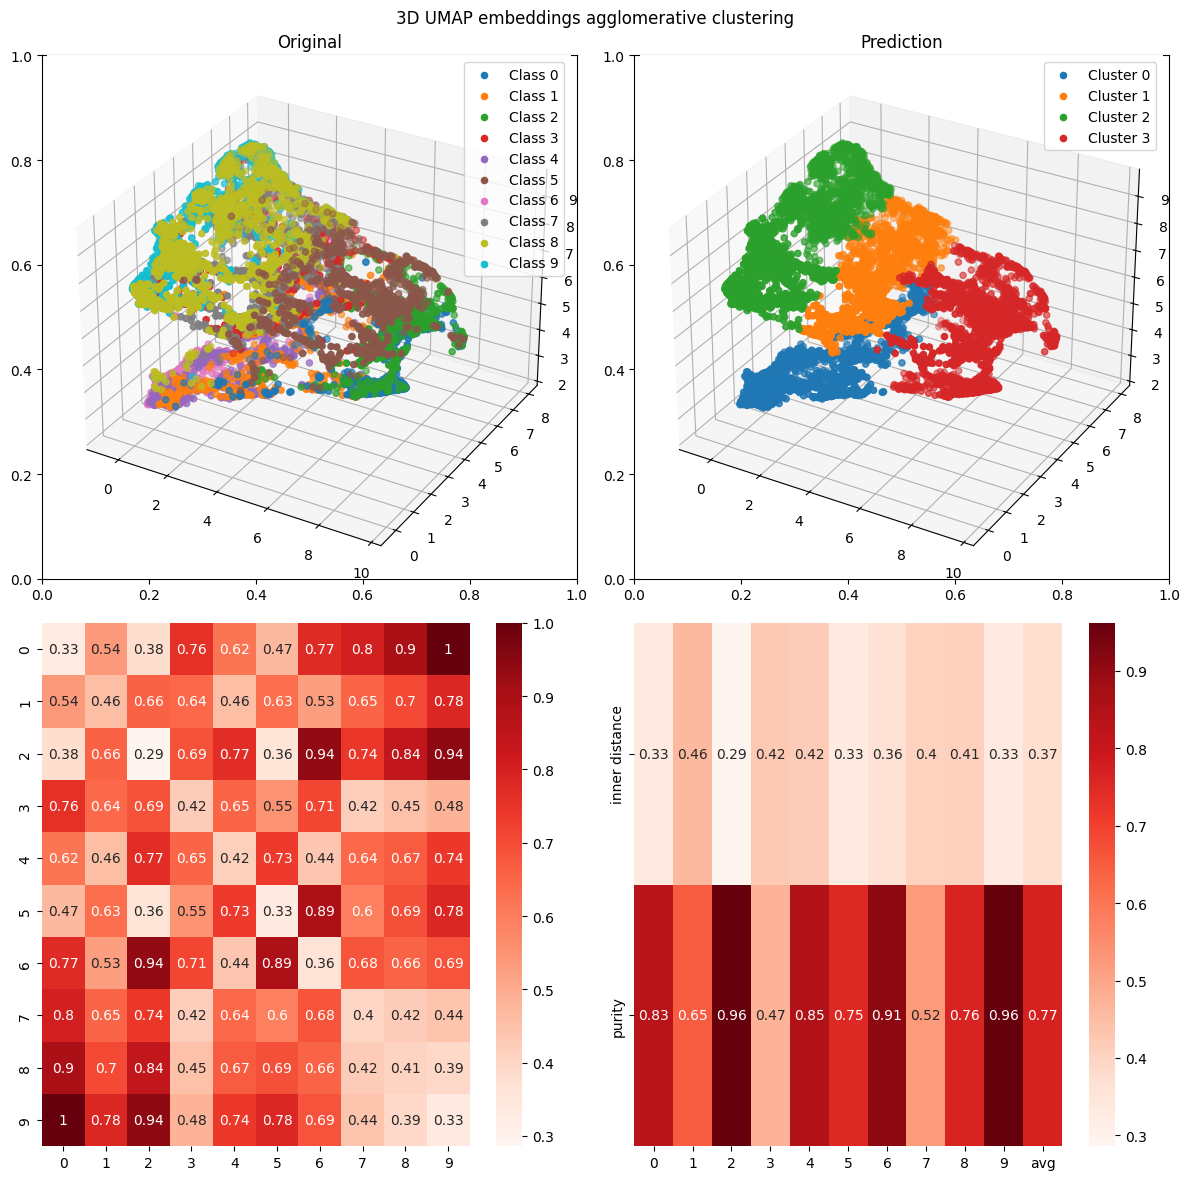

In [ ]:
plot_clustering('3D UMAP embeddings agglomerative clustering', umap_3d_embeddings, y_true, y_pred_best, 'manhattan')

In [ ]:
y_pred_grouped = np.array(itemgetter(*y_pred_best)(group))
print(y_pred_grouped.shape)
y_true_grouped = np.array(itemgetter(*y_true)(group))
print(y_true_grouped.shape)

(10000,)
(10000,)


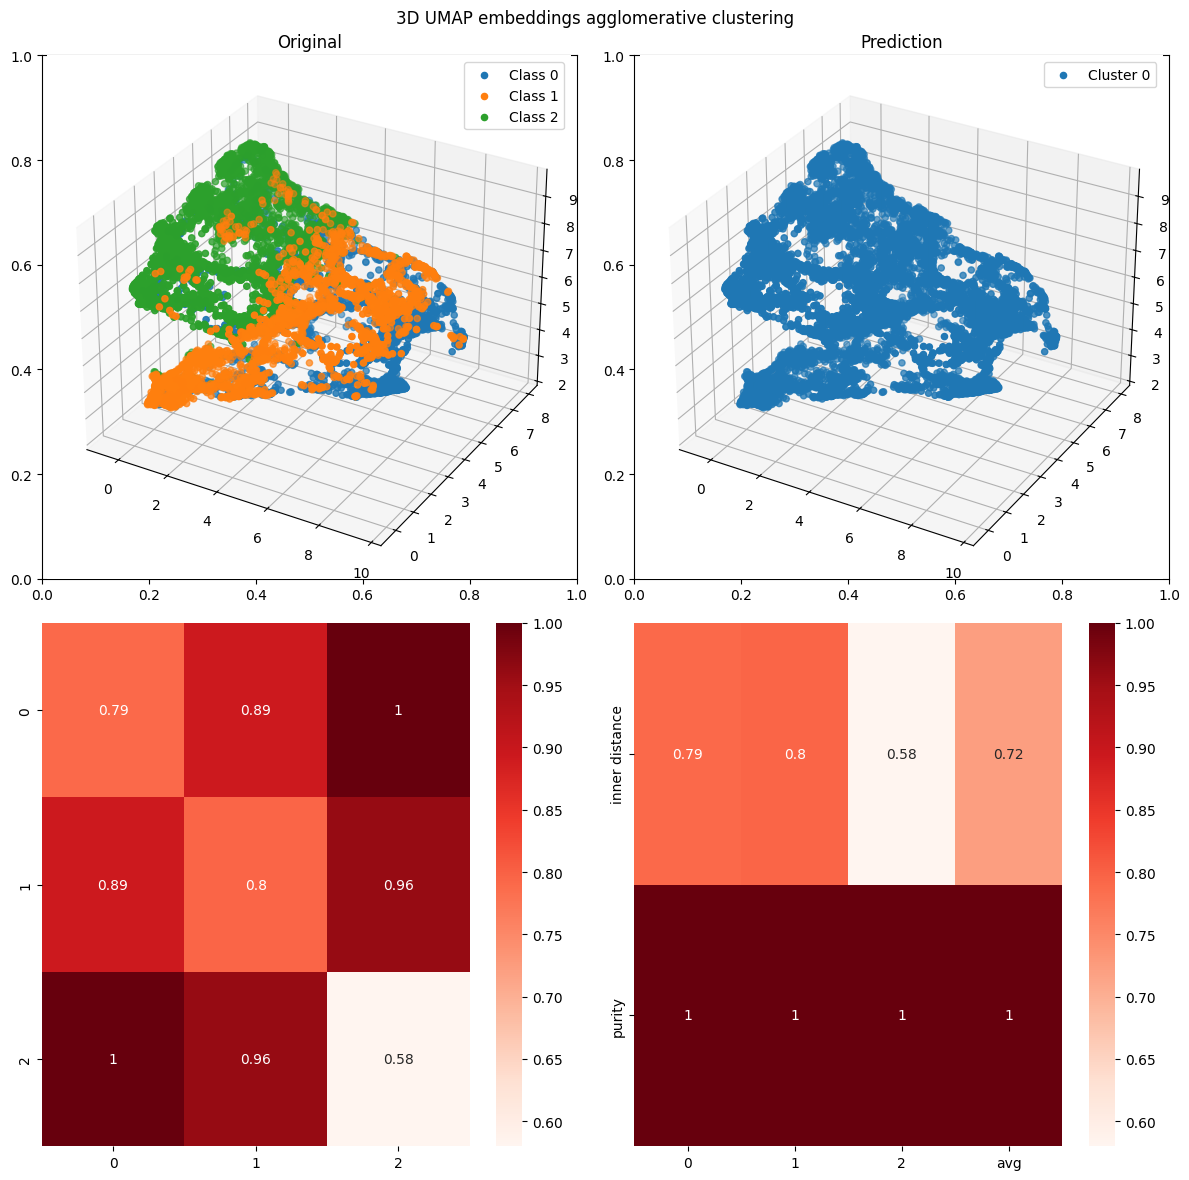

In [ ]:
plot_clustering('3D UMAP embeddings agglomerative clustering', umap_3d_embeddings, y_true_grouped, y_pred_grouped, 'manhattan')

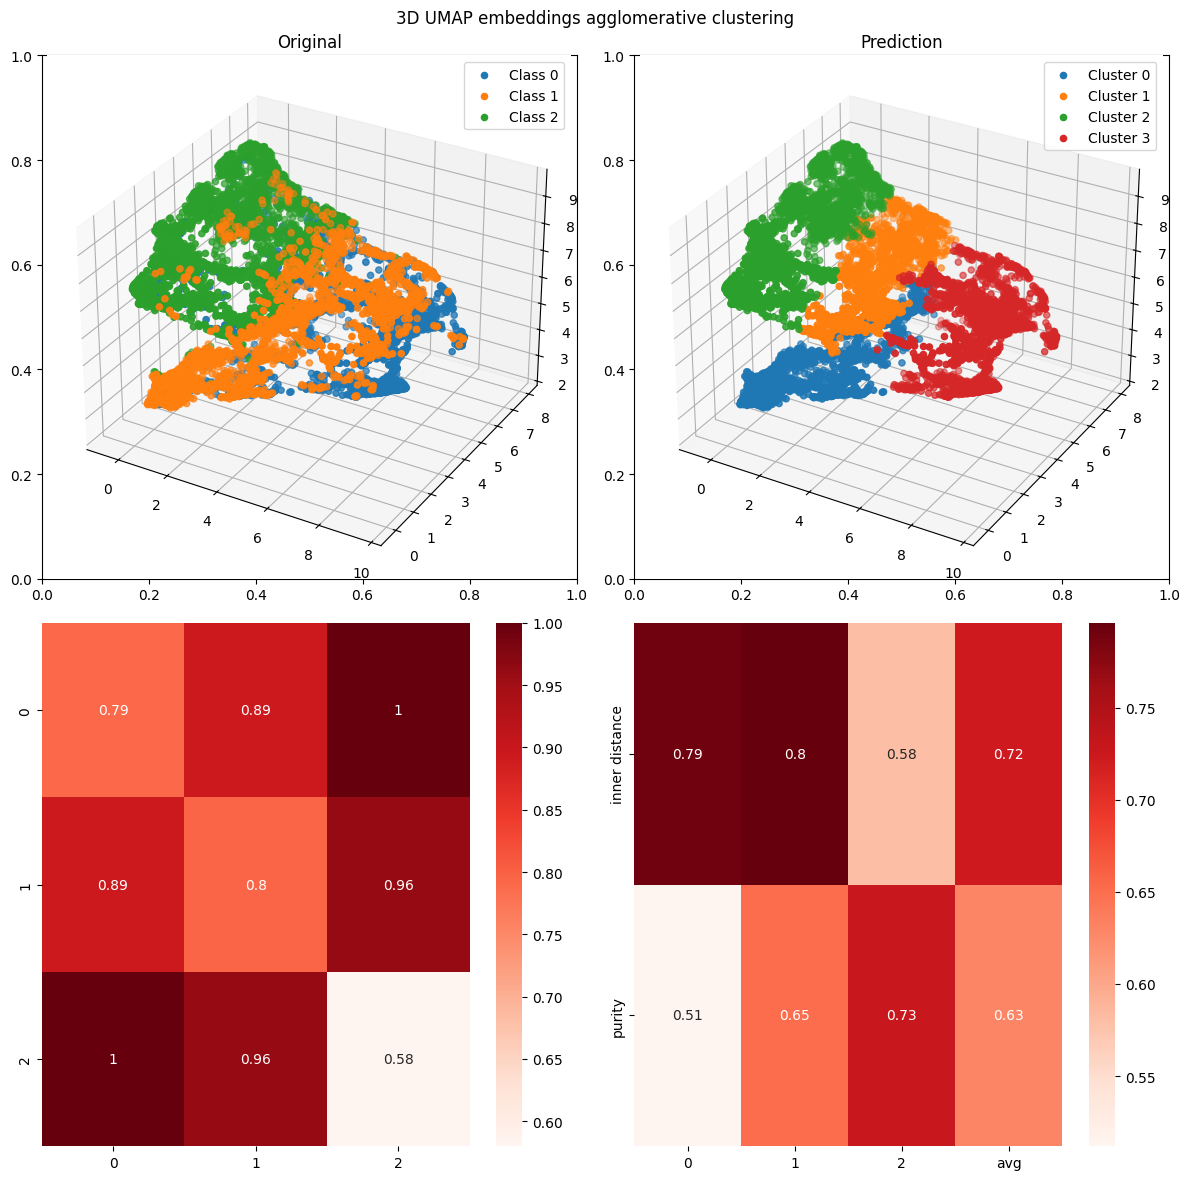

In [ ]:
plot_clustering('3D UMAP embeddings agglomerative clustering', umap_3d_embeddings, y_true_grouped, y_pred_best, 'manhattan')

In [ ]:
print(f"ARI: {adjusted_rand_score(y_true_grouped, y_pred_best)}")
print(f"DBI: {davies_bouldin_score(umap_3d_embeddings, y_pred_best)} (original: {davies_bouldin_score(umap_3d_embeddings, y_true_grouped)})")
print(f"Silhouette: {silhouette_score(umap_3d_embeddings, y_pred_best, random_state=7)} (original: {silhouette_score(umap_3d_embeddings, y_true_grouped, random_state=7)})")
print(f"Calinski Harabasz: {calinski_harabasz_score(umap_3d_embeddings, y_pred_best)} (original: {calinski_harabasz_score(umap_3d_embeddings, y_true_grouped)})")

ARI: 0.3700749683843364
DBI: 1.2052390793668915 (original: 2.47766701864998)
Silhouette: 0.3403078317642212 (original: 0.1633807271718979)
Calinski Harabasz: 5771.69921875 (original: 1961.3592529296875)


Возьмём за основу этот результат и продолжим улучшать его, меняя алгоритм кластеризации.

In [ ]:
dbi_orig = davies_bouldin_score(X, y_true_grouped)
silhouette_orig = silhouette_score(X, y_true_grouped, random_state=7)
calinski_harabasz_orig = calinski_harabasz_score(X, y_true_grouped)

dbi_umap = davies_bouldin_score(umap_3d_embeddings, y_true_grouped)
silhouette_umap = silhouette_score(umap_3d_embeddings, y_true_grouped, random_state=7)
calinski_harabasz_umap = calinski_harabasz_score(umap_3d_embeddings, y_true_grouped)

dbi_scores = []
ari_scores = []
silhouette_scores = []
calinski_harabasz_scores = []

for k in range(2, 20):
  y_pred = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='average').fit_predict(umap_3d_embeddings)
  dbi_scores.append(davies_bouldin_score(umap_3d_embeddings, y_pred))
  ari_scores.append(adjusted_rand_score(y_true_grouped, y_pred))
  silhouette_scores.append(silhouette_score(umap_3d_embeddings, y_pred, random_state=7))
  calinski_harabasz_scores.append(calinski_harabasz_score(umap_3d_embeddings, y_pred))

print(f"Optimal clusters count (DBI):               {np.argmin(dbi_scores)+2}")
print(f"Optimal clusters count (ARI):               {np.argmax(ari_scores)+2}")
print(f"Optimal clusters count (Silhouette):        {np.argmax(silhouette_scores)+2}")
print(f"Optimal clusters count (Calinski Harabasz): {np.argmax(calinski_harabasz_scores)+2}")

Optimal clusters count (DBI):               7
Optimal clusters count (ARI):               3
Optimal clusters count (Silhouette):        6
Optimal clusters count (Calinski Harabasz): 6


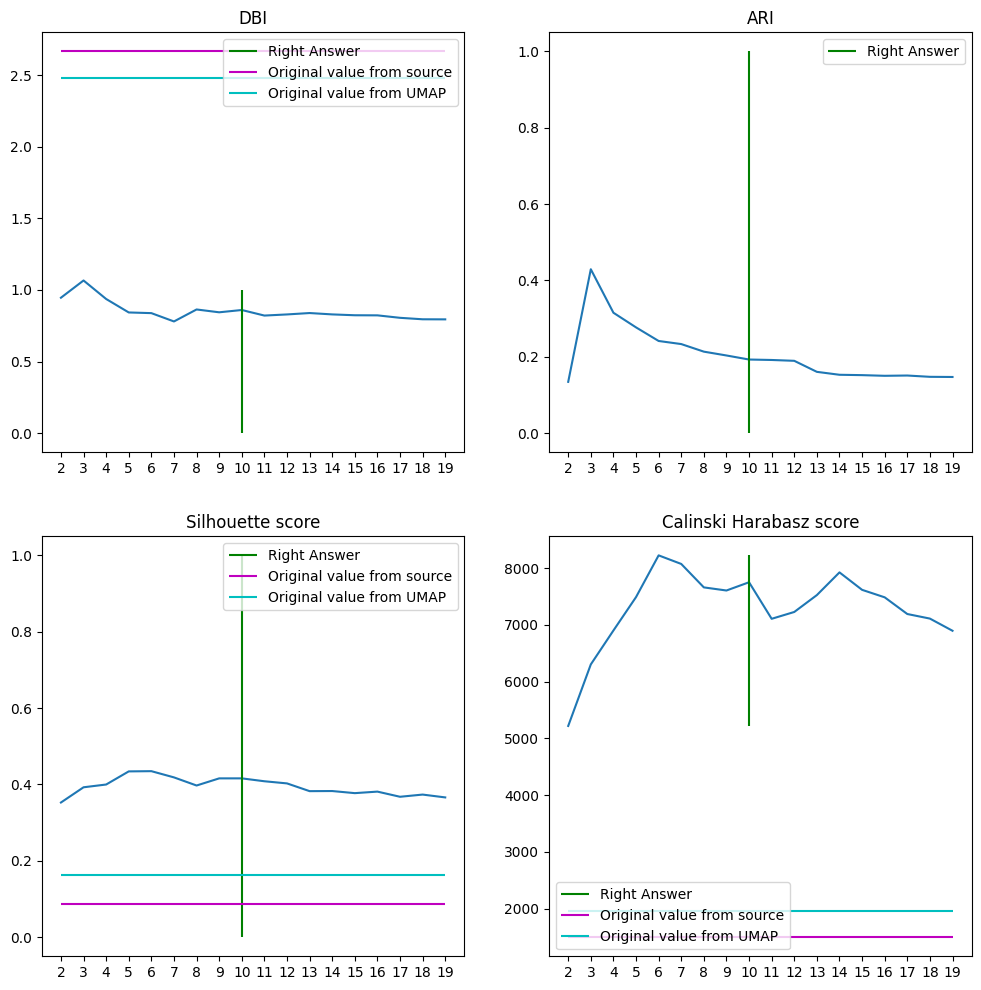

In [ ]:
fig, plots = plt.subplots(2, 2, figsize=(12,12))
k_range = np.arange(2, 20)

plots[0, 0].plot(k_range, dbi_scores)
plots[0, 1].plot(k_range, ari_scores)
plots[1, 0].plot(k_range, silhouette_scores)
plots[1, 1].plot(k_range, calinski_harabasz_scores)

plots[0, 0].set_title('DBI')
plots[0, 1].set_title('ARI')
plots[1, 0].set_title('Silhouette score')
plots[1, 1].set_title('Calinski Harabasz score')

right_answer = len(np.unique(y_true))
plots[0, 0].vlines(right_answer, 0, 1, color='g', label='Right Answer')
plots[0, 1].vlines(right_answer, 0, 1, color='g', label='Right Answer')
plots[1, 0].vlines(right_answer, 0, 1, color='g', label='Right Answer')
plots[1, 1].vlines(right_answer, np.min(calinski_harabasz_scores), np.max(calinski_harabasz_scores), color='g', label='Right Answer')

plots[0, 0].hlines(dbi_orig, 2, 19, color='m', label='Original value from source')
plots[1, 0].hlines(silhouette_orig, 2, 19, color='m', label='Original value from source')
plots[1, 1].hlines(calinski_harabasz_orig, 2, 19, color='m', label='Original value from source')

plots[0, 0].hlines(dbi_umap, 2, 19, color='c', label='Original value from UMAP')
plots[1, 0].hlines(silhouette_umap, 2, 19, color='c', label='Original value from UMAP')
plots[1, 1].hlines(calinski_harabasz_umap, 2, 19, color='c', label='Original value from UMAP')

plots[0, 0].set_xticks(k_range)
plots[0, 1].set_xticks(k_range)
plots[1, 0].set_xticks(k_range)
plots[1, 1].set_xticks(k_range)

plots[0, 0].legend(loc='best')
plots[0, 1].legend(loc='best')
plots[1, 0].legend(loc='best')
plots[1, 1].legend(loc='best')

plt.show()

In [ ]:
from hdbscan import HDBSCAN

y_pred = HDBSCAN().fit_predict(X)

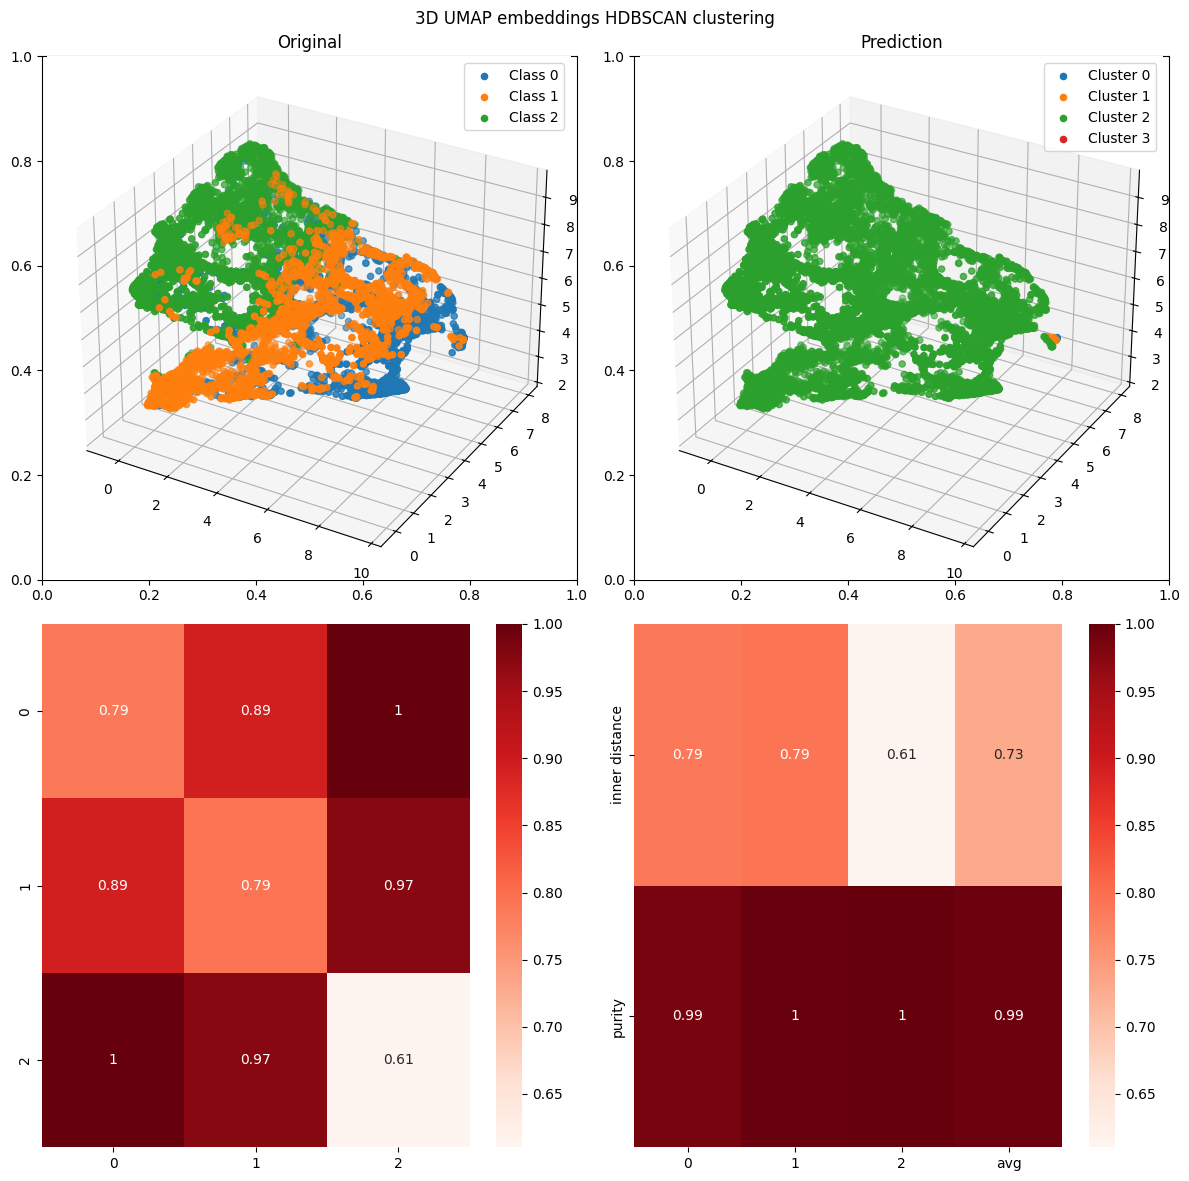

In [ ]:
plot_clustering('3D UMAP embeddings HDBSCAN clustering', umap_3d_embeddings, y_true_grouped, y_pred, 'euclidean')

In [ ]:
def custom_ari(estimator, X):
    labels = estimator.fit_predict(X)

    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[estimator.labels_ >= 0] = True

    if not np.any(core_samples_mask):
        return 0.0

    true_labels = y_true[core_samples_mask]
    labels = labels[core_samples_mask]

    return adjusted_rand_score(true_labels, labels)

def custom_dbi(estimator, X):
    labels = estimator.fit_predict(X)

    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[estimator.labels_ >= 0] = True

    if not np.any(core_samples_mask):
        return 0.0

    true_labels = y_true[core_samples_mask]
    labels = labels[core_samples_mask]

    return -davies_bouldin_score(X[core_samples_mask], labels)

def coverage(estimator, X):
    labels = estimator.fit_predict(X)

    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[estimator.labels_ >= 0] = True

    return np.mean(core_samples_mask)

In [ ]:
from sklearn.model_selection import GridSearchCV

def estimate_hdbscan(refit):
  param_grid = {
    'min_cluster_size': np.arange(500, 1500, 100),
    'min_samples': np.arange(1, 30, 3),
    'metric': ['euclidean', 'manhattan', 'cosine']
  }
  hdb = HDBSCAN()
  grid_search = GridSearchCV(hdb, param_grid, scoring={'ARI': custom_ari, 'DBI': custom_dbi, 'coverage': coverage}, refit=refit)
  grid_search.fit(umap_3d_embeddings)

  best_params = grid_search.best_params_

  y_pred = HDBSCAN(min_cluster_size = grid_search.best_params_['min_cluster_size'],
                  min_samples = grid_search.best_params_['min_samples'],
                  metric = grid_search.best_params_['metric']).fit_predict(umap_3d_embeddings)

  return best_params, y_pred

In [ ]:
def visualize_dbscan(best_params, y_pred):
  print(f"Best parameters: {best_params}")
  core_samples_mask = np.zeros_like(y_pred, dtype=bool)
  core_samples_mask[y_pred >= 0] = True
  cov = np.mean(core_samples_mask)

  print(f"ARI: {adjusted_rand_score(y_true_grouped, y_pred)}")
  print(f"DBI: {davies_bouldin_score(umap_3d_embeddings, y_pred)}")
  print(f"ARI (covered): {adjusted_rand_score(y_true_grouped[core_samples_mask], y_pred[core_samples_mask])}")
  print(f"DBI (covered): {davies_bouldin_score(umap_3d_embeddings[core_samples_mask], y_pred[core_samples_mask])}")
  print(f"Coverage: {cov}")
  print(f"N clusters: {len(np.unique(y_pred))}")
  plot_clustering('3D UMAP embeddings HDBSCAN clustering', umap_3d_embeddings, y_true_grouped, y_pred, 'euclidean')

In [ ]:
best_params, y_pred = estimate_hdbscan('ARI')

Best parameters: {'metric': 'euclidean', 'min_cluster_size': np.int64(600), 'min_samples': np.int64(1)}
ARI: 0.2424599683825942
DBI: 1.3025442129101814
ARI (covered): 0.2461666516141598
DBI (covered): 1.3868352057600888
Coverage: 0.926
N clusters: 3


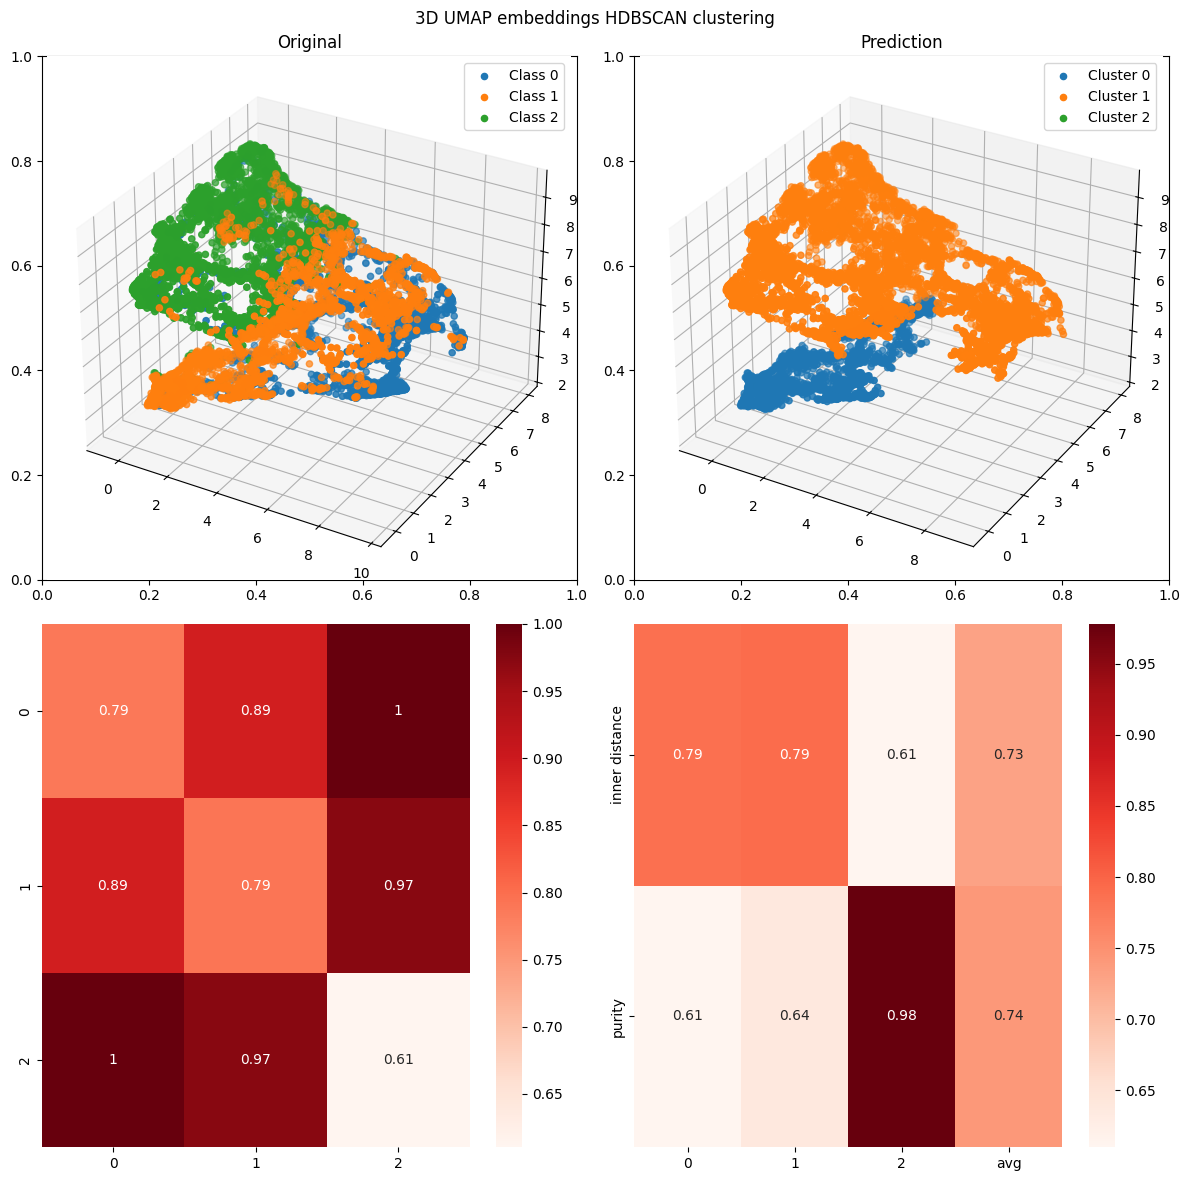

In [ ]:
visualize_dbscan(best_params, y_pred)

Best parameters: {'metric': 'euclidean', 'min_cluster_size': np.int64(600), 'min_samples': np.int64(1)}
ARI: 0.2424599683825942
DBI: 1.3025442129101814
ARI (covered): 0.2461666516141598
DBI (covered): 1.3868352057600888
Coverage: 0.926
N clusters: 3


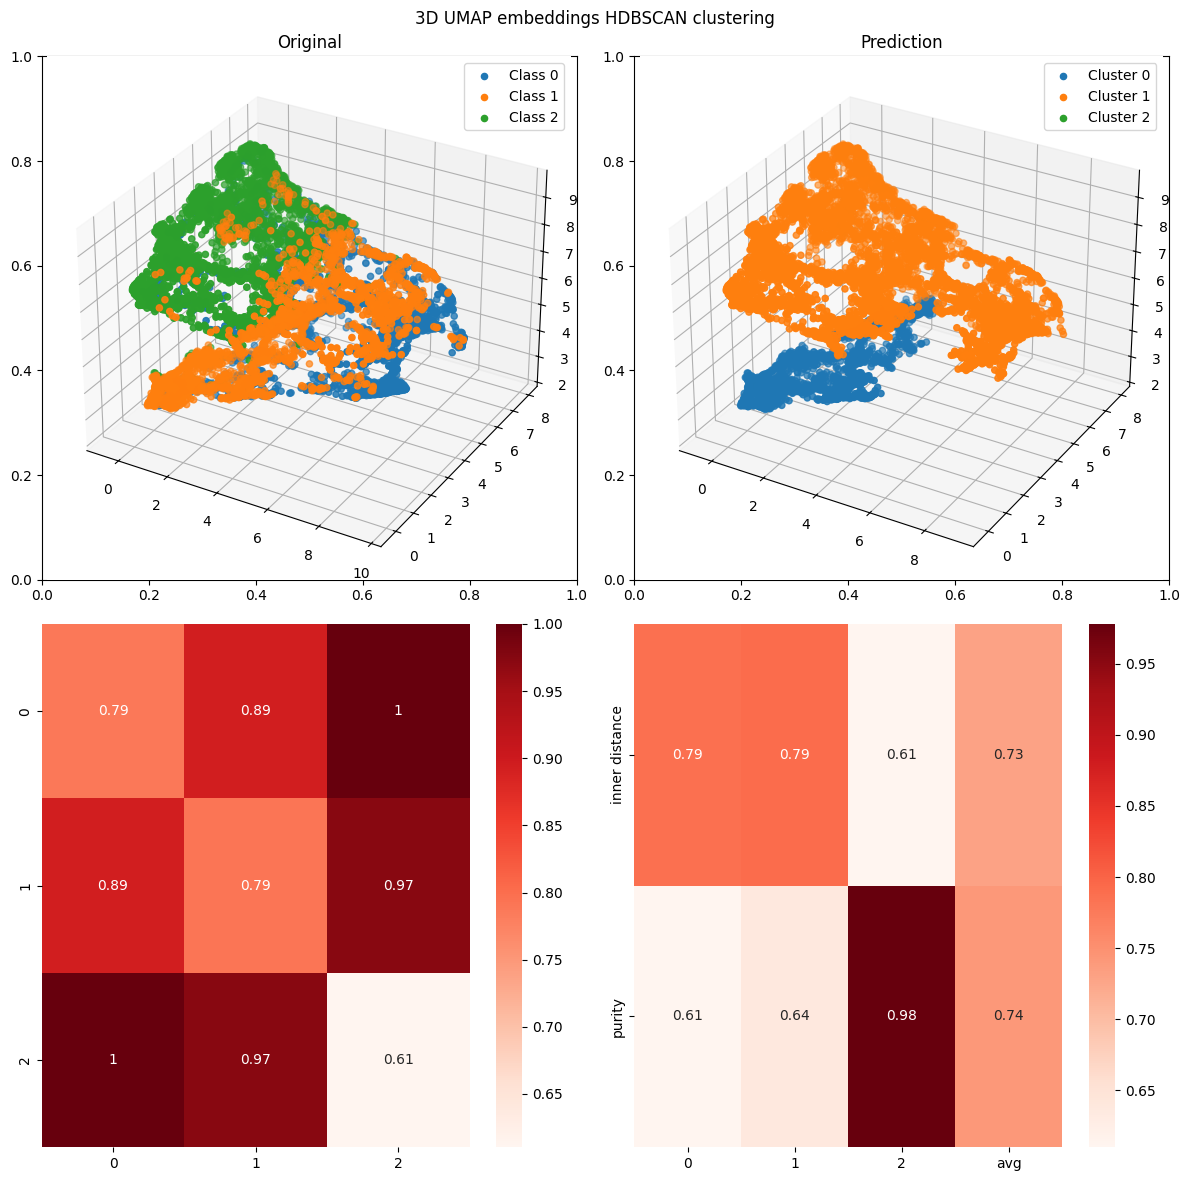

In [ ]:
best_params, y_pred = estimate_hdbscan('DBI')
visualize_dbscan(best_params, y_pred)

Best parameters: {'metric': 'euclidean', 'min_cluster_size': np.int64(500), 'min_samples': np.int64(4)}
ARI: 0.17115872198386295
DBI: 2.039794139834161
ARI (covered): 0.25548828224987785
DBI (covered): 1.1782350310581156
Coverage: 0.7754
N clusters: 6


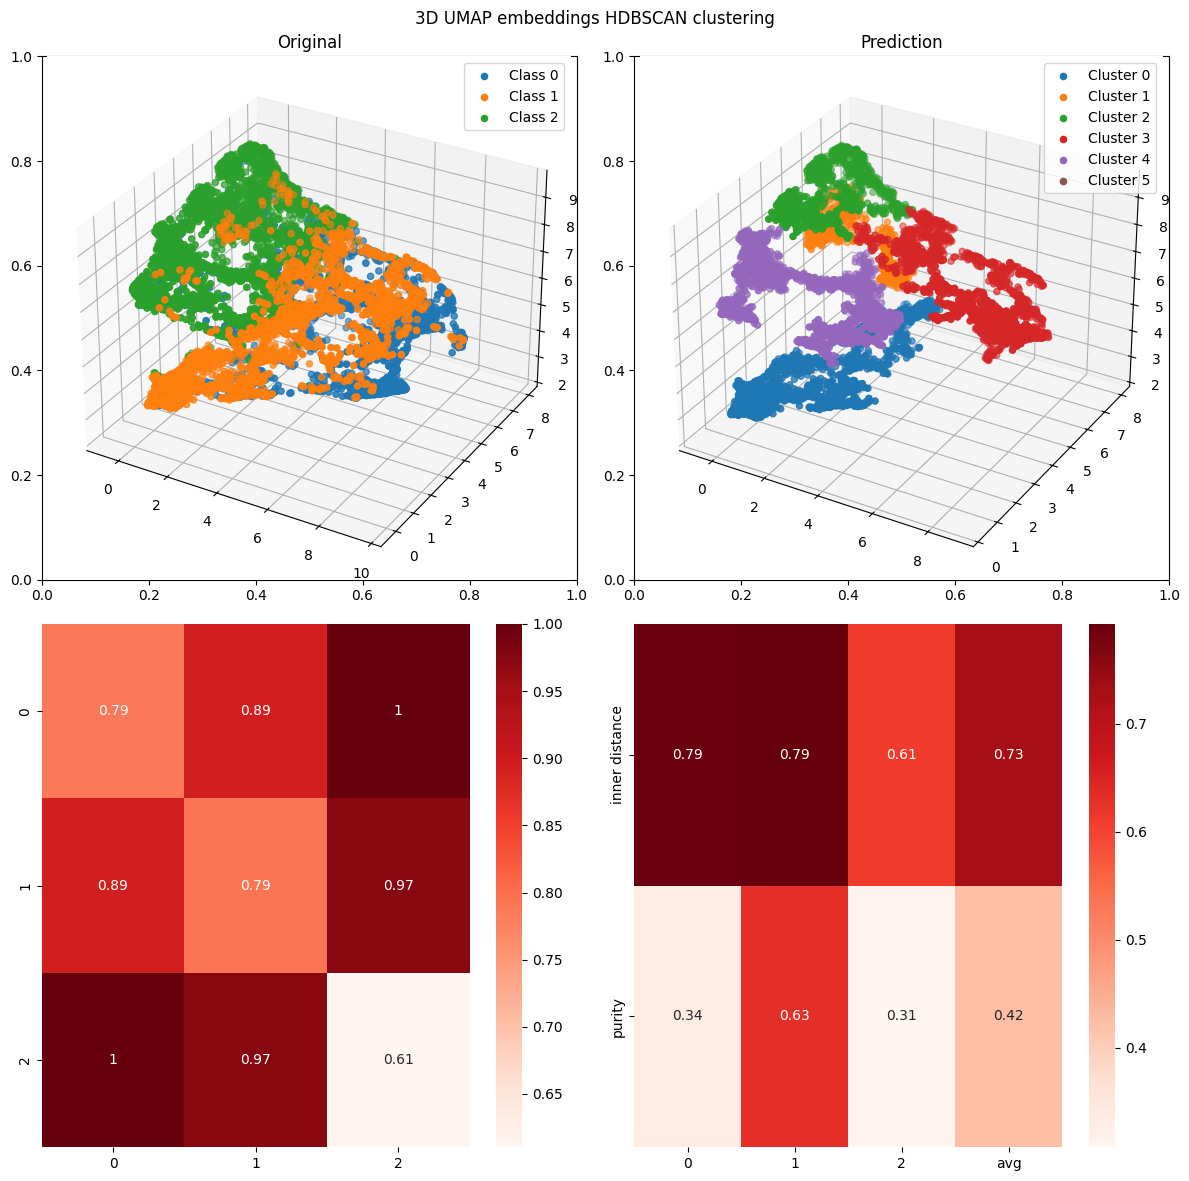

In [ ]:
best_params, y_pred = estimate_hdbscan('coverage')
visualize_dbscan(best_params, y_pred)

https://blog.dailydoseofds.com/p/hdbscan-vs-dbscan